<a href="https://colab.research.google.com/github/aparna993/mltestdata/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import textblob
import nltk
import matplotlib.pyplot as plt
from nltk import *
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df_test = pd.read_csv("/test_data.txt")
#df = df_test[0].str.split(',', expand=True)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            2331 non-null   object
 1   hashtags        2334 non-null   object
 2   geography       2 non-null      object
 3   reply_count     2334 non-null   int64 
 4   retweet_count   2334 non-null   int64 
 5   favorite_count  2334 non-null   int64 
 6   timestamp       2332 non-null   object
 7   source          2332 non-null   object
dtypes: int64(3), object(5)
memory usage: 146.0+ KB


In [0]:
df_test.drop('index',axis = 1)

In [0]:
df_test.text = df_test.text.astype(str)
n = df_test.text.shape[0]
text_list = []
for i in range (0,n):
  x = df_test.text.loc[i]
  text = TextBlob(x)
  if text != 'None':
    text_list.append(text)


In [222]:
type(text_list[0])

textblob.blob.TextBlob

In [0]:
  sentiment_l = []
  polarity_l = []
  subjectivity_l = []
  for blob in text_list:
    sentence = blob.sentences
    sentiment = blob.sentiment
    sentiment_l.append(sentiment)
    polarity =  sentiment.polarity
    polarity_l.append(polarity)
    subjectivity = sentiment.subjectivity
    subjectivity_l.append(subjectivity)



In [248]:
pol_subj= pd.DataFrame({'polarity':polarity_l,'subjectivity':subjectivity_l})
pol_subj

,polarity,subjectivity
0,0.200000,0.900000
1,0.000000,0.000000
2,0.266071,0.567857
3,-0.125000,1.000000
4,-0.200000,0.350000
...,...,...
227,-0.377778,0.594444
228,-0.031818,0.377273
229,0.191667,0.600000
230,-0.400000,0.450000


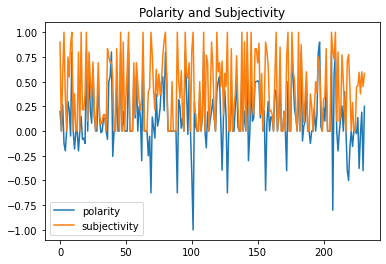

In [294]:
#plt.figure(figsize=(20,10))
pol_subj.plot(title = 'Polarity and Subjectivity')

In [0]:
stop = stopwords.words('english')
stop.append('RT')
stop.append('None')


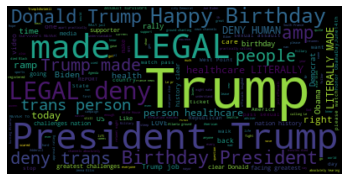

In [292]:
txt = df_test.text.str.cat(sep = ' ')
wordcloud = WordCloud(stopwords = stop).generate(txt)
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis('off')
plt.show()
